## Coin toss random walk
We're gonna throw 1 coin toss per unit time. The bet is \$1 on each coin toss (if heads, we add \$1 to our account, and if tails, we subtract it). The array $X$ represents our account, where $X[i]$ is the amount of money in our account (could be negative) after the $i^{th}$ toss. We start with $X[0] = 0$.

What is the variance of the net money won after each toss? That is:
$$
\frac{1^2 + (-1)^2}{2} = 1
$$
Since the variance of the sum of RVs is the sum of the variance of those RVs, the variance of the account after $t$ tosses is $t$ (the time taken to throw those tosses).<br><br><br>

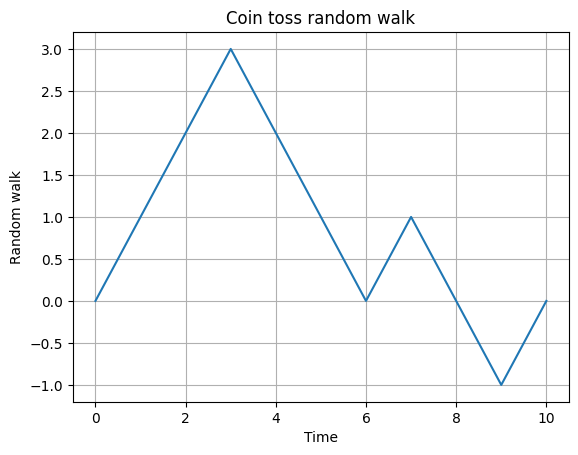

In [166]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt

### Parameters
T = 10 # Time period of interest

### Body
T = math.floor(T)
X = np.zeros(T + 1) # Initialize the random walk
for i in range(1, T + 1):
    deltaX = random.choice([-1, 1]) # Take the random steps
    X[i] = X[i - 1] + deltaX

# Plot the walk
plt.plot(range(T + 1), X)
plt.xlabel("Time")
plt.ylabel("Random walk")
plt.title("Coin toss random walk")
plt.grid(True)
plt.show() 

Now let's modify the bet, and the pace of the tosses. In a time period $T$, we're gonna trow $N$ coin tosses, at a pace of $\frac{T}{N}$ per coin toss. We're gonna be betting \$ $\sqrt{\frac{T}{N}}$ on each coin toss.

What is the variance of the net money won after each toss? That is:
$$
\frac{\sqrt{\frac{T}{N}}^2 + \left(-\sqrt{\frac{T}{N}}\right)^2}{2} = \frac{\frac{T}{N} + \frac{T}{N}}{2} = \frac{T}{N}
$$
Again, this coincides with the amount ot time taken to throw those tosses, and so does the variance after $N$ tosses: $N\frac{T}{N} = T$.

The random walk $X$ has two very important properties: the Markov property and the Martingale property.<br><br><br>

#### Markov property:
The random variable $X[i]$ conditional upon all of the past values of $X$ $\left(X[j] \text{ for all } j<i\right)$ only depends on the previous value $X[i-1]$, or the latest known value if $X[i-1]$ isn't known.

For example, if I know the value of $X[j]$ for $j = 0, 1, 2, 3, 4$, then $X[5]$ is a random variable only dependent on $X[4]$, $X[j]$ for $j = 0, 1, 2, 3$ is irrelevant. But also, $X[8]$ only depends on $X[4]$ too, since it's the latest known value (we don't know $X[j]$ for $j = 5, 6, 7$).

Remember, each step $X[i] - X[i-1]$ is a random variable which could be $\sqrt{\frac{T}{N}}$ or $-\sqrt{\frac{T}{N}}$, both with probability $0.5$.<br><br>

#### Martingale property
The conditional expectation of your winnings at any time in the future is just the amount you already hold. More precisely, if $X[i]$ is the last value of the random walk $X$ you know, then the expected value of $X[j]$ for all $j>i$ is $X[i]$.

For example, suppose again we know $X[i]$ for $i=0, 1, 2, 3, 4$. Then the expected value of both $X[5]$ and $X[8]$ is $X[4]$. In fact, the expected value of $X[i]$ for all $i>4$ is $X[4]$.<br><br><br>

The following code simulates a coin toss random walk from time $0$ to time $T$. Modify the parameters $T$ and $N$ as you like, experiment with it.

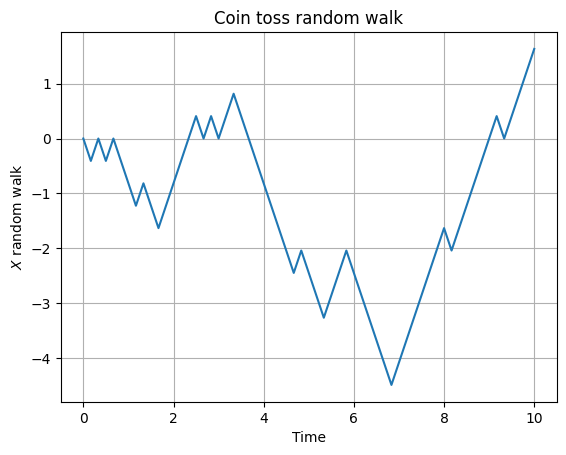

In [175]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt

### Parameters
T = 10 # Time period of interest
N = 60 # Number of tosses in T

### Body
bet = math.sqrt(T / N)

X = np.zeros(N + 1) # Initialize the random walk
for i in range(1, N + 1):
    deltaX = random.choice([-bet, bet]) # Take the random steps
    X[i] = X[i - 1] + deltaX

# Plot the walk
plt.plot(np.arange(N + 1) * T / N, X)
plt.xlabel("Time")
plt.ylabel("$X$ random walk")
plt.title("Coin toss random walk")
plt.grid(True)
plt.show() 

Observe, after running many simulations and noting the value of $X[N]$ (the end of the random walk), that the variance of $X[N]$ is, roughly by eye, $T$, and its expected value 0. You may even modify the code to run many simulations and calculate both metrics. You may do so for any $X[i]$, and observe that its variance is $i\frac{T}{N}$, and expected value 0.<br><br><br><br>

## Brownian motion/Wiener process
Now let us code the Brownian motion/Wiener process (we'll use both names). The Wiener process is not a step-based random walk, but a continuous time-dependent walk, $X(t)$. It is the limit of the coin toss random walk when $N$ tends to infinity. Thus, using an identical code but with a very high $N$ would yield a very good approximation. However, it is not quite the same. In a Wiener process, any increment, $X(t + dt) - X(t)$, is a normally distributed random variable with expected value $0$ and variance equal to the time step $dt$.

Mathematically, this is because there are infinite coin tosses happening between any increment, all with a very, very small bet. By the Central Limit Theorem, the sum of an arbirarily large number of identical random variables converges to a normally distributed random variable.

Hence, the only difference in the code is we must generate a normally distributed RV for the increment, not choose between adding or subtracting the bet.

As you can probably deduce, a Wiener process conserves the Markov property (future values only depend on $X(t)$ for the latest $t$ known) and the Martingale property (the expected value of any future value is equal to $X(t)$ for the latest $t$ known).

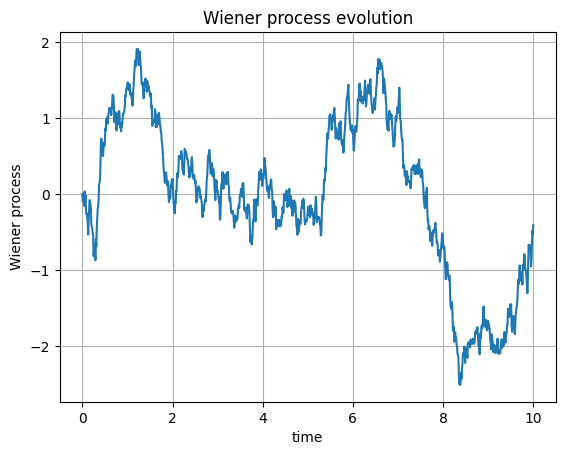

In [176]:
### Parameters
T = 10 # Time period of interest
dt = 1/100 # Time step

### Body
N = round(T / dt) # Number of steps in the approximation

X = np.zeros(N + 1) # Initialize the random walk
for i in range(1, N + 1):
    dX = np.random.normal(scale = math.sqrt(dt)) # scale= is the standard deviation, or the square root of the variance.
    X[i] = X[i - 1] + dX

# Plot the Wiener process
plt.plot(np.arange(N + 1) * dt, X)
plt.xlabel("time")
plt.ylabel("Wiener process")
plt.title("Wiener process evolution")
plt.grid(True)
plt.show() 

Even though a Brownian motion is continuous, and in Python we can't do anything else but use discrete time steps, this code doesn't create an approximation of a Brownian motion, it is exactly a Brownian motion (with the only disadvantage that we only have the value at discrete $t$, but they have no error), thanks to the use of normally distributed increments.<br><br><br><br>

## Geometric Brownian Motion
The next kind of variable that we will look at is the Geometric Brownian Motion (GBM). It is the most widely accepted model for equities, commodities, indices... A Geometric Brownian Motion, S (for "stock"), satisfies the GBM stochastic differentianl equation (SDE):
$$
dS = \mu S\cdot dt + \sigma S\cdot dX(t)
$$
where $\mu$, called drift, and $\sigma$, called volatility, are both constant. $X(t)$ is a Brownian motion, so $dX(t)=X(t + dt) - X(t)$  is a normally distributed RV with variance $dt$. A GBM can have any initial value. Of course, if it's $0$, it will stay $0$ forever, which is not interesting. Let us program an approximation to a Geometric Brownian Motion with finite differences for very small time steps.

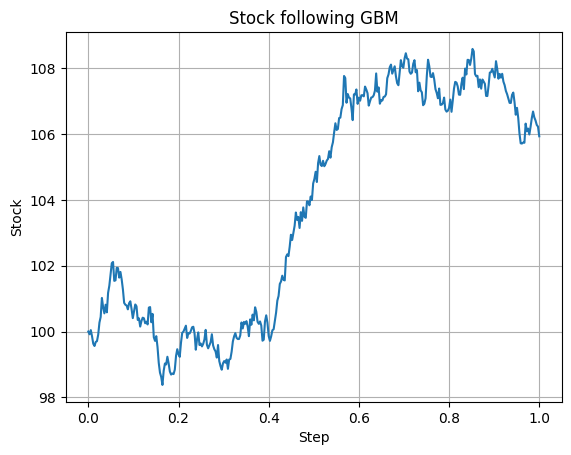

In [177]:
### Parameters
S = 100 # Initial value of stock, in $
mu = 0.05 # Drift, in years^(-1)
sigma = 0.05 # Volatility, in years^(-1/2)
dt = 1/365 # Time step, in years
T = 1 # Time period of interest, in years

### Body
N = round(T / dt) # Total time steps
time = np.arange(N + 1) * dt # time-axis for the plot

S_motion = np.zeros(N + 1) # Initialize the array with stock values
S_motion[0] = S # Current value
for i in range(N):
    dX = np.random.normal(scale = math.sqrt(dt))
    dS = mu * S_motion[i] * dt + sigma * S_motion[i] * dX # Geometric Brownian Motion differential equation
    S_motion[i + 1] = S_motion[i] + dS

# Plot the stock
plt.plot(time, S_motion)
plt.xlabel("Step")
plt.ylabel("Stock")
plt.title("Stock following GBM")
plt.grid(True)
plt.show()

The GBM stochastic differential equation turns out to have a solution. It is solved using Ito's Lemma, the main tool for stochastic calculus. You can't solve SDEs with the same tools as for non-stochastic DEs, naturally, because a Wiener process doesn't behave like a normal variable (for example, it is not differentiable). The solution is the following:
$$
S = S_0e^{(\mu - \frac{1}{2}\sigma^2)t + \sigma X(t)}
$$
For a GBM, using the SDE to calculate finite increments doesn't yield the exact solution, but an approximation. The following code plots the finite difference approximation as well as the exact solution, both using the same Wiener process (first plot). The last plot shows their difference. Smaller time steps lead to smaller error, naturally. You may play with the inputs ("mu" or "sigma" will affect the behaviour of the GBM, and "dt" affects the quality of the finite difference approximation) for better understanding.

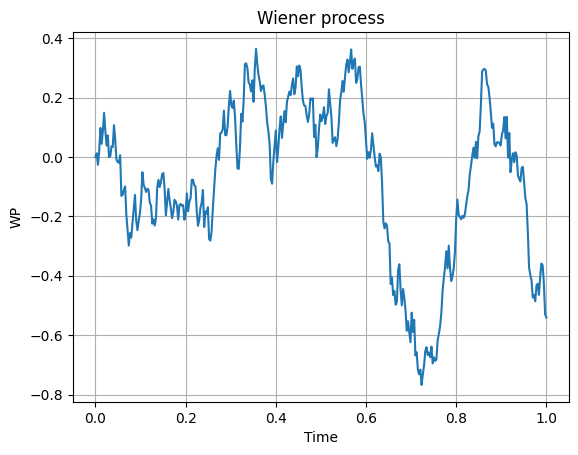

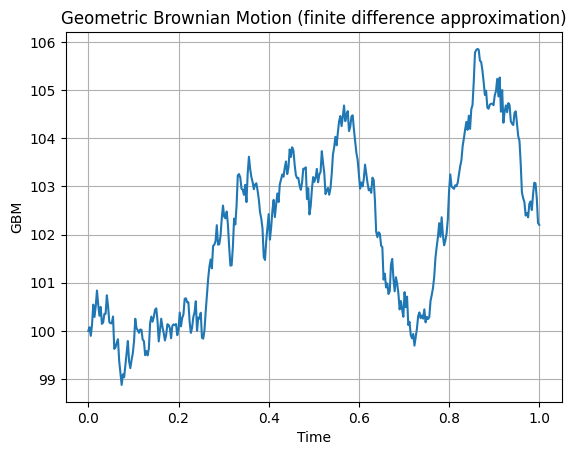

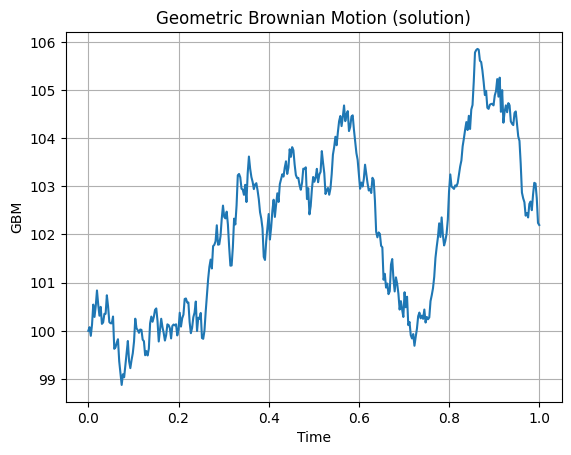

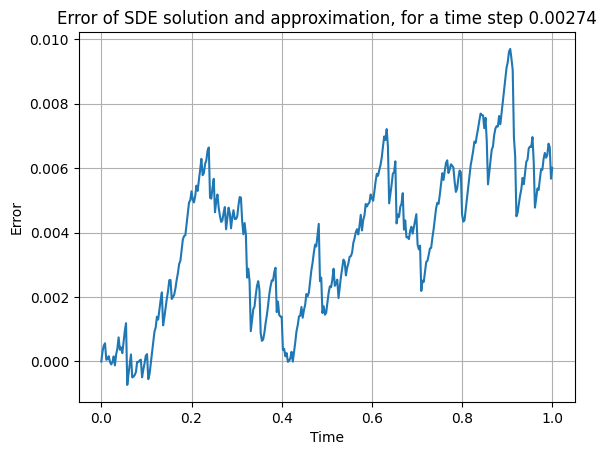

In [178]:
### Parameters
S = 100 # Initial value of stock, in $
mu = 0.05 # Drift, in years^(-1)
sigma = 0.05 # Volatility, in years^(-1/2)
dt = 1/365 # Time step, in years
T = 1 # Time period of interest, in years

### Body
N = round(T / dt) # Total time steps
time = np.arange(N + 1) * dt # time-axis for the plot

S_motion = np.zeros(N + 1) # Initialize the array with stock values
X = np.zeros(N + 1) # Initialize Wiener process
S_motion[0] = S # Current value
for i in range(N):
    dX = np.random.normal(scale = math.sqrt(dt))
    dS = S_motion[i] * (mu * dt + sigma * dX) # Geometric Brownian Motion differential equation
    S_motion[i + 1] = S_motion[i] + dS
    X[i + 1] = X[i] + dX

# Plot the Wiener process
plt.plot(time, X)
plt.xlabel("Time")
plt.ylabel("WP")
plt.title("Wiener process")
plt.grid(True)
plt.show() 

# Plot the GBM
plt.plot(time, S_motion)
plt.xlabel("Time")
plt.ylabel("GBM")
plt.title("Geometric Brownian Motion (finite difference approximation)")
plt.grid(True)
plt.show() 

# Check that the GBM SDE analytical solution is correct
sol_S_motion = S * np.exp((mu - sigma ** 2 / 2) * time + sigma * X) # Mathematical solution, note "time" and "X" are both np arrays of length N + 1
# Observe similar or almost identical shape
plt.plot(time, sol_S_motion)
plt.xlabel("Time")
plt.ylabel("GBM")
plt.title("Geometric Brownian Motion (solution)")
plt.grid(True)
plt.show()

# Plot difference/error, observe very low numbers
plt.plot(time, S_motion - sol_S_motion)
plt.xlabel("Time")
plt.ylabel("Error")
plt.title(f'Error of SDE solution and approximation, for a time step {format(dt, ".3g")}')
plt.grid(True)
plt.show()